## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function. To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

### Solution

We first create the list of random numbers

In [85]:
import numpy as np
x = np.random.rand(500000)

#### Approach 1

In [86]:
def min_max1(x):
    # YOUR CODE HERE
    x_min = x[0]
    for n in x:
        if n < x_min:
            x_min = n
    
    x_max = x[0]
    for n in x:
        if n > x_max:
            x_max = n
    
    return  x_min, x_max

%time min, max = min_max1(x)
print(min, max)

Wall time: 91.8 ms
9.79418325330883e-08 0.9999993306223837


#### Approach 2

In [87]:
def min_max2(x):
    # YOUR CODE HERE
    x = x.copy()
    x.sort()
    return x[0], x[-1]

%time min, max = min_max2(x)
print(min, max)

Wall time: 33 ms
9.79418325330883e-08 0.9999993306223837


In [88]:
assert min_max1(x) == min_max2(x)

In practice, we would use the the NumPy function:

In [104]:
print(np.min(x), np.max(x))

"Changed"
%time min, max = np.min(x), np.max(x)

9.79418325330883e-08 0.9999993306223837
Wall time: 640 µs


## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here
    
    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:
$$
f(x) = \tan(x) - 2x
$$
between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
and show the roots computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

### Solution

We first implement a Newton solver function:

In [211]:
import numpy as np

def newton(f, df, x, tol=1e-8, max_it=20, it_count=0):
    """Find root of equation defined by function f(x) where df(x) is
    first derivative and x is the initial guess.Optional arguments tol 
    (tolerance) and max_it (maximum number of iterations)"""
    
    # YOUR CODE HERE
    
    # Compute new x
    x += -f(x)/df(x)
    #print(x, f(x), -f(x)/df(x)) # For debug
    
    # Output x
    if f(x) < tol:
        return x
    
    # Exit recursion if max_it reached
    it_count += 1
    if it_count >= max_it:
        print("Maximum iteration reached - will display results with {} iterations:\n".format(max_it))
        return x
    
    return newton(f, df, x, tol, max_it, it_count)


We now provide implementations of `f` and `df`, and find the roots:

In [212]:
def f(x):
    # YOUR CODE HERE
    return np.tan(x) - 2*x

def df(x):
    # YOUR CODE HERE
    return (1/np.cos(x))**2 - 2

In [219]:
# YOUR CODE HERE
x_root = newton(f, df, 1.2)
print(x_root, f(x_root))

1.1655610008436832 -8.174916188430359e-07


We can visualise the result:

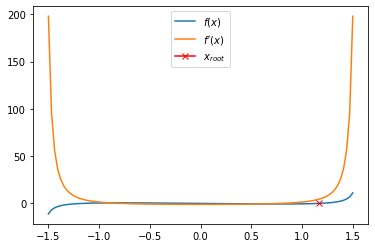

In [214]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot f and df/dx
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")

# Add location of roots to plot
# YOUR CODE HERE
plt.plot(x_root, f_x_root, '-xr', label = '$x_{root}$')

# Add legend
plt.legend()

plt.show()

For the extension, we can replace the function `df(x)` with a new version

In [215]:
def df(x):
    # Try changing dx to 1e-15 or smaller
    dx = 1e-14
    # YOUR CODE HERE
    return (f(x + dx) - f(x - dx)) / (2 * dx)

In [216]:
# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

AssertionError: 

In [217]:
# Apparently my method is slightly different from the above = different tolerence? extra loops? idk whatever

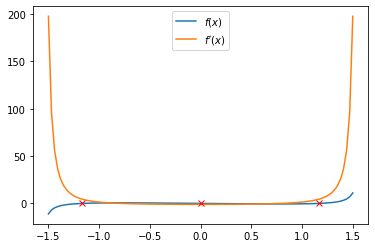

In [218]:
# Plot f, f' and roots

# YOUR CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt

# Plot f and df/dx
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")

# Add location of roots to plot
# YOUR CODE HERE
plt.plot(xroots, f(xroots), '-xr', linestyle = '')

# Add legend
plt.legend()

plt.show()

In practice, we could use the Newton function `scipy.optimize.newton` from SciPy (http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) rather than implementing our own function.

## Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (375, 500, 3)


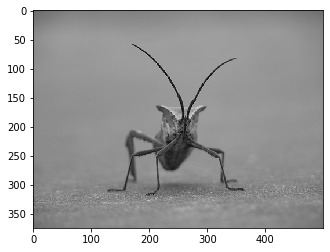

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.imshow(img);

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array 
and  returns the  filtered image. With this particular filter, the value of a pixel in the filtered image 
is equal to the average value of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, 
the neighbours are  `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

In [283]:
# YOUR CODE HERE
def blur(img, it = 1):
    
    # Initialize boundary values
    x_hi = img.shape[0] - 1
    y_hi = img.shape[1] - 1
    
    # Create a deep copy of the image
    f_img = np.zeros_like(img)
    
    # Blur the pixels inside the frame
    for i in range(1,x_hi):
        for j in range(1,y_hi):
            f_img[i,j,:] = (img[i,j+1,:] + img[i,j-1,:] + img[i+1,j,:] + img[i-1,j,:]) / 4
            
    # Blur starting and ending rows and columns
    for i in range(1,x_hi):
        f_img[i,0,:] = (img[i+1,0,:] + img[i-1,0,:]) / 2
        f_img[i,y_hi,:] = (img[i+1,y_hi,:] + img[i-1,y_hi,:]) / 2
    for j in range(1,x_hi):
        f_img[0,j,:] = (img[0,j+1,:] + img[0,j-1,:]) / 2
        f_img[x_hi,j,:] = (img[x_hi,j+1,:] + img[x_hi,j-1,:]) / 2
    
    # Keep the corners
    f_img[0,0,:] = img[0,0,:]
    f_img[0,y_hi,:] = img[0,y_hi,:]
    f_img[x_hi,0,:] = img[x_hi,0,:]
    f_img[x_hi,y_hi,:] = img[x_hi,y_hi,:]
    
    # Return the blurred image if iteration reaches zero
    it -= 1
    if it <= 0:
        return f_img
    
    # blur is a recursive function - feed back into the function to apply the filter again
    return blur(f_img, it)

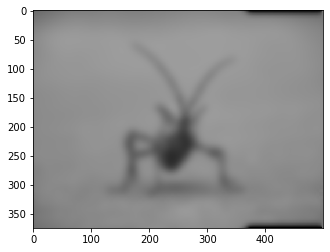

In [284]:
f_img = blur(img,5)

plt.imshow(f_img)
plt.show()

In [282]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import image
img = mpimg.imread('Whatsapp.png')

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# WILL RETURN TO THIS LATER FOR SOME TESTING

FileNotFoundError: [Errno 2] No such file or directory: 'Whatsapp.png'